## 1. Environment Setup

In [1]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# scikit-learn libraries/ML packages
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score

## 2. Data Import

In [2]:
# Import the training and testing dataset
df_train = pd.read_csv('data/train.csv', parse_dates=['joining_date'])
df_test = pd.read_csv('data/test.csv', parse_dates=['joining_date'])
sample = pd.read_csv('data/sample_submission.csv')

# Keeping aside the target data
target = df_train['churn_risk_score']
df_train.drop('churn_risk_score', axis=1, inplace=True)

In [3]:
print('Training Dataset Shape >>> ' + str(df_train.shape))
print('Testing Dataset Shape >>> ' + str(df_test.shape))

Training Dataset Shape >>> (36992, 24)
Testing Dataset Shape >>> (19919, 24)


In [4]:
# Making a copy of the training dataset to perform operations
df_train_copy = df_train.copy()
print('Training Dataset Copy Shape >>> ' + str(df_train_copy.shape))

Training Dataset Copy Shape >>> (36992, 24)


In [5]:
df_train_copy.head().T

,0,1,2,3,4
customer_id,fffe4300490044003600300030003800,fffe43004900440032003100300035003700,fffe4300490044003100390032003600,fffe43004900440036003000330031003600,fffe43004900440031003900350030003600
Name,Pattie Morrisey,Traci Peery,Merideth Mcmeen,Eufemia Cardwell,Meghan Kosak
age,18,32,44,37,31
gender,F,F,F,M,F
security_no,XW0DQ7H,5K0N3X1,1F2TCL3,VJGJ33N,SVZXCWB
region_category,Village,City,Town,City,City
membership_category,Platinum Membership,Premium Membership,No Membership,No Membership,No Membership
joining_date,2017-08-17 00:00:00,2017-08-28 00:00:00,2016-11-11 00:00:00,2016-10-29 00:00:00,2017-09-12 00:00:00
joined_through_referral,No,?,Yes,Yes,No
referral_id,xxxxxxxx,CID21329,CID12313,CID3793,xxxxxxxx


## 3. EDA

In [6]:
# Checking the dtypes of the columns
df_train_copy.dtypes

customer_id                             object
Name                                    object
age                                      int64
gender                                  object
security_no                             object
region_category                         object
membership_category                     object
joining_date                    datetime64[ns]
joined_through_referral                 object
referral_id                             object
preferred_offer_types                   object
medium_of_operation                     object
internet_option                         object
last_visit_time                         object
days_since_last_login                    int64
avg_time_spent                         float64
avg_transaction_value                  float64
avg_frequency_login_days                object
points_in_wallet                       float64
used_special_discount                   object
offer_application_preference            object
past_complain

In [7]:
# Checking null values
df_train_copy.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [8]:
# Dropping customer_id, Name, security_no, referral_id
df_train_copy.drop(['customer_id', 'Name', 'security_no', 'referral_id'], axis=1, inplace=True)

In [9]:
df_train_copy.head().T

,0,1,2,3,4
age,18,32,44,37,31
gender,F,F,F,M,F
region_category,Village,City,Town,City,City
membership_category,Platinum Membership,Premium Membership,No Membership,No Membership,No Membership
joining_date,2017-08-17 00:00:00,2017-08-28 00:00:00,2016-11-11 00:00:00,2016-10-29 00:00:00,2017-09-12 00:00:00
joined_through_referral,No,?,Yes,Yes,No
preferred_offer_types,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Credit/Debit Card Offers
medium_of_operation,?,Desktop,Desktop,Desktop,Smartphone
internet_option,Wi-Fi,Mobile_Data,Wi-Fi,Mobile_Data,Mobile_Data
last_visit_time,16:08:02,12:38:13,22:53:21,15:57:50,15:46:44


In [10]:
df_train_copy['feedback'].unique()

array(['Products always in Stock', 'Quality Customer Care',
       'Poor Website', 'No reason specified', 'Poor Product Quality',
       'Poor Customer Service', 'Too many ads', 'User Friendly Website',
       'Reasonable Price'], dtype=object)

In [11]:
df_train_copy['complaint_status'].unique()

array(['Not Applicable', 'Solved', 'Solved in Follow-up', 'Unsolved',
       'No Information Available'], dtype=object)

In [12]:
df_train_copy['preferred_offer_types'].unique()

array(['Gift Vouchers/Coupons', 'Credit/Debit Card Offers',
       'Without Offers', nan], dtype=object)

In [13]:
# Replacing ? with Nan
df_train_copy.replace('?', np.nan, inplace=True)

In [14]:
df_train_copy.head().T

,0,1,2,3,4
age,18,32,44,37,31
gender,F,F,F,M,F
region_category,Village,City,Town,City,City
membership_category,Platinum Membership,Premium Membership,No Membership,No Membership,No Membership
joining_date,2017-08-17 00:00:00,2017-08-28 00:00:00,2016-11-11 00:00:00,2016-10-29 00:00:00,2017-09-12 00:00:00
joined_through_referral,No,NaN,Yes,Yes,No
preferred_offer_types,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Credit/Debit Card Offers
medium_of_operation,NaN,Desktop,Desktop,Desktop,Smartphone
internet_option,Wi-Fi,Mobile_Data,Wi-Fi,Mobile_Data,Mobile_Data
last_visit_time,16:08:02,12:38:13,22:53:21,15:57:50,15:46:44


In [15]:
df_train_copy.isnull().sum()

age                                0
gender                             0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [16]:
# Extracting joining year, month, date
df_train_copy['joining_year'] = df_train_copy['joining_date'].dt.year
df_train_copy['joining_month'] = df_train_copy['joining_date'].dt.month
df_train_copy['joining_day'] = df_train_copy['joining_date'].dt.day

In [17]:
df_train_copy.head().T

,0,1,2,3,4
age,18,32,44,37,31
gender,F,F,F,M,F
region_category,Village,City,Town,City,City
membership_category,Platinum Membership,Premium Membership,No Membership,No Membership,No Membership
joining_date,2017-08-17 00:00:00,2017-08-28 00:00:00,2016-11-11 00:00:00,2016-10-29 00:00:00,2017-09-12 00:00:00
joined_through_referral,No,NaN,Yes,Yes,No
preferred_offer_types,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Credit/Debit Card Offers
medium_of_operation,NaN,Desktop,Desktop,Desktop,Smartphone
internet_option,Wi-Fi,Mobile_Data,Wi-Fi,Mobile_Data,Mobile_Data
last_visit_time,16:08:02,12:38:13,22:53:21,15:57:50,15:46:44


In [18]:
# Extracting hour, minute and second from last visited time
df_train_copy['last_visit_time'] = pd.to_datetime(df_train_copy['last_visit_time'])
df_train_copy['last_visited_hour'] = df_train_copy['last_visit_time'].dt.hour
df_train_copy['last_visited_minute'] = df_train_copy['last_visit_time'].dt.minute
df_train_copy['last_visited_second'] = df_train_copy['last_visit_time'].dt.second

In [19]:
df_train_copy.shape

(36992, 26)

In [20]:
# Dropping the last_visit_time and joining_date
df_train_copy.drop(['last_visit_time', 'joining_date'], axis=1, inplace=True)
df_train_copy.shape

(36992, 24)

In [21]:
df_train_copy.dtypes

age                               int64
gender                           object
region_category                  object
membership_category              object
joined_through_referral          object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
joining_year                      int64
joining_month                     int64
joining_day                       int64
last_visited_hour                 int64
last_visited_minute               int64
last_visited_second               int64
dtype: object

In [22]:
# Filling NaN values with mode for the following columns
mode_cols = ['region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation']
for column in mode_cols:
    df_train_copy[column].fillna(df_train_copy[column].mode()[0], inplace=True)

In [23]:
df_train_copy.isnull().sum()

age                                0
gender                             0
region_category                    0
membership_category                0
joined_through_referral            0
preferred_offer_types              0
medium_of_operation                0
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
joining_year                       0
joining_month                      0
joining_day                        0
last_visited_hour                  0
last_visited_minute                0
last_visited_second                0
dtype: int64

In [24]:
median_col = ['points_in_wallet']
for column in median_col:
    df_train_copy[column].fillna(df_train_copy[column].median(), inplace=True)

In [25]:
df_train_copy.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
joining_year                    0
joining_month                   0
joining_day                     0
last_visited_hour               0
last_visited_minute             0
last_visited_second             0
dtype: int64

In [26]:
# Converting Strings to category
for label, content in df_train_copy.items():
    if pd.api.types.is_string_dtype(content):
        df_train_copy[label] = content.astype('category').cat.as_ordered()
    
    # Turning categories into numbers and adding one
    if not pd.api.types.is_numeric_dtype(content):
        df_train_copy[label] = pd.Categorical(content).codes + 1

In [27]:
df_train_copy.dtypes

age                               int64
gender                             int8
region_category                    int8
membership_category                int8
joined_through_referral            int8
preferred_offer_types              int8
medium_of_operation                int8
internet_option                    int8
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days          int16
points_in_wallet                float64
used_special_discount              int8
offer_application_preference       int8
past_complaint                     int8
complaint_status                   int8
feedback                           int8
joining_year                      int64
joining_month                     int64
joining_day                       int64
last_visited_hour                 int64
last_visited_minute               int64
last_visited_second               int64
dtype: object

In [28]:
df_train_copy.head().T

,0,1,2,3,4
age,18.00,32.00,44.00,37.00,31.00
gender,1.00,1.00,1.00,2.00,1.00
region_category,3.00,1.00,2.00,1.00,1.00
membership_category,4.00,5.00,3.00,3.00,3.00
joined_through_referral,1.00,1.00,2.00,2.00,1.00
preferred_offer_types,2.00,2.00,2.00,2.00,1.00
medium_of_operation,2.00,2.00,2.00,2.00,3.00
internet_option,3.00,2.00,3.00,2.00,2.00
days_since_last_login,17.00,16.00,14.00,11.00,20.00
avg_time_spent,300.63,306.34,516.16,53.27,113.13


In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_train_copy, target, test_size=0.3, random_state=42)

**Preprocessing Helper Function**

In [31]:
def preprocess(data, train=True):
    '''
    Step 1: Feature Extraction
    Step 2: Dropping Columns
    Step 3: Filling Null Values
    Step 4: Converting to Categorica
    '''
    # Replacing ? with Nan at the beginning
    data.replace('?', np.nan, inplace=True)
    
    # Step 1: Feature Extraction
    
    # Extracting hour, minute and second from last visited time
    data['last_visit_time'] = pd.to_datetime(data['last_visit_time'])
    data['last_visited_hour'] = data['last_visit_time'].dt.hour
    data['last_visited_minute'] = data['last_visit_time'].dt.minute
    data['last_visited_second'] = data['last_visit_time'].dt.second
    
    # Extracting joining year, month, date
    data['joining_year'] = data['joining_date'].dt.year
    data['joining_month'] = data['joining_date'].dt.month
    data['joining_day'] = data['joining_date'].dt.day
    
    # Step 2: Dropping the columns
    if(train==True):
        drop_cols = ['last_visit_time', 'joining_date', 'customer_id', 'Name', 'security_no', 'referral_id']
        data.drop(drop_cols, axis=1, inplace=True)
    else:
        drop_cols = ['last_visit_time', 'joining_date', 'Name', 'security_no', 'referral_id']
        data.drop(drop_cols, axis=1, inplace=True)
    
    # Step 3: Filling Null Values
    mode_cols = ['region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation']
    for column in mode_cols:
        data[column].fillna(data[column].mode()[0], inplace=True)
        
    median_col = ['points_in_wallet']
    for column in median_col:
        data[column].fillna(data[column].median(), inplace=True)
    
#     # Step 4: Converting to categorical columns and adding cat codes
#     for label, content in data.items():
#         # Converting string dtypes to categorical columns
#         if pd.api.types.is_string_dtype(content):
#             data[label] = content.astype("category").cat.as_ordered()
        
#         # Converting to cat codes
#         if not pd.api.types.is_categorical_dtype(content):
#             data[label] = pd.Categorical(content).codes + 1

    return data

In [32]:
df_train_processed = df_train.copy()
df_train_processed = preprocess(df_train_processed, True)

In [34]:
df_train_processed.head().T

,0,1,2,3,4
age,18,32,44,37,31
gender,F,F,F,M,F
region_category,Village,City,Town,City,City
membership_category,Platinum Membership,Premium Membership,No Membership,No Membership,No Membership
joined_through_referral,No,No,Yes,Yes,No
preferred_offer_types,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Credit/Debit Card Offers
medium_of_operation,Desktop,Desktop,Desktop,Desktop,Smartphone
internet_option,Wi-Fi,Mobile_Data,Wi-Fi,Mobile_Data,Mobile_Data
days_since_last_login,17,16,14,11,20
avg_time_spent,300.63,306.34,516.16,53.27,113.13


In [38]:
numerical = []
for label, content in df_train_processed.items():
    if not pd.api.types.is_string_dtype(content):
        numerical.append(label)

In [39]:
numerical

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'points_in_wallet',
 'last_visited_hour',
 'last_visited_minute',
 'last_visited_second',
 'joining_year',
 'joining_month',
 'joining_day']

In [40]:
df_train_processed[df_train_processed['avg_time_spent'] < 0]

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,offer_application_preference,past_complaint,complaint_status,feedback,last_visited_hour,last_visited_minute,last_visited_second,joining_year,joining_month,joining_day
28,61,F,Village,Silver Membership,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,17,-936.744818,...,No,Yes,No Information Available,No reason specified,7,48,25,2017,5,14
41,22,M,Town,No Membership,Yes,Without Offers,Desktop,Wi-Fi,4,-930.207844,...,Yes,Yes,Solved in Follow-up,Too many ads,0,22,50,2017,6,2
60,28,M,Village,Gold Membership,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,9,-615.344319,...,Yes,No,Not Applicable,Quality Customer Care,9,42,14,2017,5,17
79,54,M,Town,Silver Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,-687.629574,...,No,Yes,No Information Available,Poor Website,4,30,27,2017,6,21
116,51,M,Village,Platinum Membership,No,Without Offers,Desktop,Fiber_Optic,3,-494.083877,...,No,No,Not Applicable,Reasonable Price,16,51,53,2017,9,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36794,40,M,Village,Basic Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,17,-977.809108,...,Yes,Yes,Unsolved,Poor Customer Service,17,13,39,2016,10,22
36819,15,F,Town,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,14,-910.568433,...,Yes,Yes,Unsolved,Poor Customer Service,11,1,20,2016,6,22
36956,26,F,Town,Silver Membership,No,Without Offers,Smartphone,Fiber_Optic,16,-746.034591,...,Yes,Yes,Unsolved,Poor Website,23,34,22,2017,3,3
36987,46,F,Town,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,2,-650.682759,...,Yes,Yes,No Information Available,No reason specified,4,14,5,2017,9,21


In [41]:
def log1p(data):
    '''
    To handle the negative target data before fitting into the model
    '''
    return np.log1p(abs(data))

df_train_processed['avg_time_spent'] = log1p(df_train_processed['avg_time_spent'])

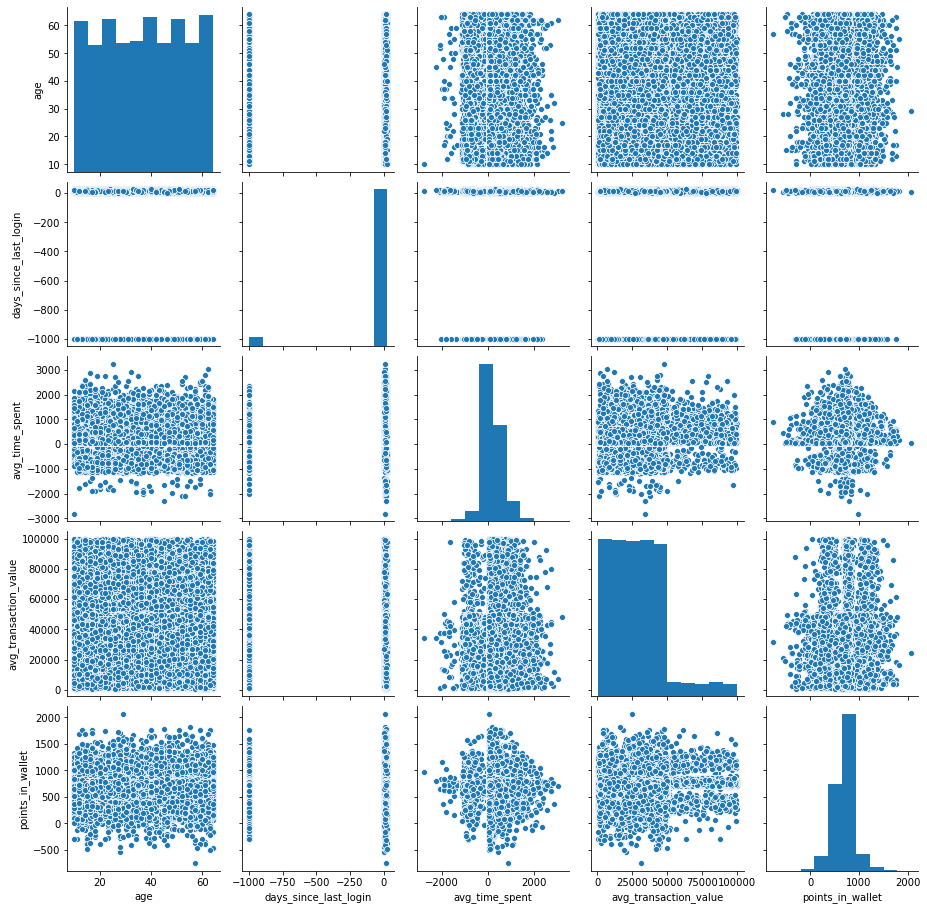

In [43]:
sns.pairplot(df_train)